

# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue and starting at year 1966. As a movie enthusiast, I am interested in exploring how the audience vote on movies over the years. This project is inspired by Youtube videos explaining "why modern movies are bad", arguing that the quality and creativity are deteriorating. I suspect that the runtime has something to do with this. I am also interested in some general details, such the number of outputs per genre and profitability. This project will use films in the TMDb database to answer the following questions.
>
<ul>
    <li>How has the output of movies changed over the years?</li>
    <li>Average Runtime Of Movies From Year To Year?</li>
    <li>Average Vote Of Movies From Year To Year?</li>
    <li>Over the years, how has the output for films of different lengths (short, average, and long) changed?</li>
    <li>What is the relationship between the films' length and vote average over time?</li>
    <li>Total Number Of Movies Released For Each Genre?</li>
    <li>Average Profit By Year?</li>
    <li>What Is The Relationship Between Release Year And Profit?</li>
</ul>

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [144]:
#Read CSV file and print first 3 lines 
df = pd.read_csv('tmdb-movies.csv') #10866 rows and 21 columns 
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [145]:
# View the last 3 rows
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [146]:
# Get a summary with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Observation
> This observation is is based off the chart obtained down below. 
> <ul>
> <li>There are a lot of movies where the budget and revenue are 0, meaning they never made it to thearter.</li>
> </ul>

In [147]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [148]:
# Since we know we are dealing with alot of 0s, lets check out how many
print(f"Total Rows With 0 In Budget:{df[df['budget']==0].shape[0]}")
print(f"Total Rows With 0 In Revenue:{df[df['revenue']==0].shape[0]}")

Total Rows With 0 In Budget:5696
Total Rows With 0 In Revenue:6016


In [149]:
# Check for nulls in columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning 

>**1st Action**: Drop Duplicate

In [150]:
#Checking for duplicates
#We do not need 2 of the same film appearing twice
df[df.duplicated() == True]

# Dropping the duplicates and putting them in place
df.drop_duplicates(inplace=True)

# Checking to see if gone
df[df.duplicated() == True]

print(f"After dropping the duplicate there is a total of {df.shape[0]} rows.")

After dropping the duplicate there is a total of 10865 rows.


>**2nd Action**: Change Release Date to Datetime

In [151]:
df['release_date'] =  pd.to_datetime(df['release_date'])
df['release_date'].head(3)

0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

>**3rd Action**: Removing all unneeded columns

In [152]:
df.drop(['id', 'imdb_id','budget_adj','revenue_adj','overview','imdb_id','homepage','tagline','keywords', 'overview'],axis =1,inplace = True)
print(f"After dropping the unneeded columns there is a total of {df.shape[1]} columns.")

After dropping the unneeded columns there is a total of 13 columns.


>**4th Action**: Drop Rows With Incorrect Values

> Although this step can be executed, I have chosen not to carry out this step because there is a variety of reasons that can explain why revenue and budget turn up as 0. Perhaps, one of the biggest reasons is simply they didn't keep track at the time which can explain the inapproriate values. Therefore, I conclude that it's inapproroiate to remove them. Let's just examine these rows.

In [153]:
#df.drop(df[df['budget']==0].index, inplace=True)
#df.drop(df[df['revenue']==0].index, inplace=True)

print(f"Total Rows With 0 In Budget After Dropping:{df[df['budget']==0].shape[0]}")
print(f"Total Rows With 0 In Revenue After Dropping:{df[df['revenue']==0].shape[0]}")

Total Rows With 0 In Budget After Dropping:5696
Total Rows With 0 In Revenue After Dropping:6016


<a id='eda'></a>
## Exploratory Data Analysis

> Please be aware that all of my visuals and codes will be below the markdown cell containing the question. 

### Question 1: How has the output of movies changed over the years?
#### Observation
> It should come as no surprise that the number of movies has risen over time. From the beginning of 1960 to 2015, the line graph shows an exponential increase of movies released per year, starting from about 25 movies and hovering between 600-700 in recent years.

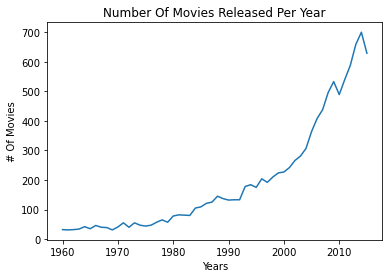

In [154]:
output_change = df.groupby('release_year').count()['original_title']
plt.plot(output_change)
plt.title("Number Of Movies Released Per Year")
plt.xlabel("Years")
plt.ylabel("# Of Movies");

### Question 2: Average Runtime Of Movies From Year To Year?
#### Observation
> Over the long term, the average runtime is getting shorter with occasional spikes. The average runtime decreased from about 111 minutes to 96.

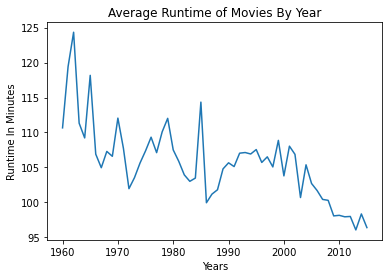

In [155]:
#Viewing the runtime average using a line plot
year_runtime_mean = df.groupby('release_year')['runtime'].mean()
plt.plot(year_runtime_mean)
plt.title("Average Runtime of Movies By Year")
plt.xlabel("Years")
plt.ylabel("Runtime In Minutes");

In [175]:
year_runtime_mean.head(1),year_runtime_mean.tail(1)

(release_year
 1960    110.65625
 Name: runtime, dtype: float64,
 release_year
 2015    96.375199
 Name: runtime, dtype: float64)

### Question 3: Average Vote Of Movies From Year To Year?
#### Observation
> Since the 1960s, the line graph shows the average votes of all movies in each respective year has been declining from decade to decade. Starting from roughly 6.3 in the 60s then sinking to 5.9 as of 2015, even hitting a low point of 5.8.

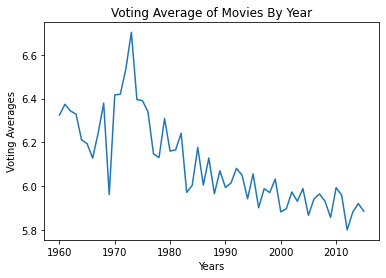

In [156]:
#Viewing the vote_average thru a line plot
year_vote_mean = df.groupby('release_year')['vote_average'].mean()
plt.plot(year_vote_mean)
plt.title("Voting Average of Movies By Year")
plt.xlabel("Years")
plt.ylabel("Voting Averages");

In [181]:
year_vote_mean.head(1),year_vote_mean.tail(1)

(release_year
 1960    6.325
 Name: vote_average, dtype: float64,
 release_year
 2015    5.885692
 Name: vote_average, dtype: float64)

In [182]:
print(f"The lowest vote average is: {year_vote_mean.min()}.")

The lowest vote average is: 5.7998299319727895.


### Question 4: Over the years, how has the output for films of different lengths (short, average, and long) changed? 

> **Step 1**: First, we want to create a mask with 'runtime' variable. We will seperate the movies into 3 different categories: short, average and long. Afterward, we need to determine how to seperate the time; to do this, we did a quick Google search of average film length. Using information gathered from Toward Data Science (https://towardsdatascience.com/are-new-movies-longer-than-they-were-10hh20-50-year-ago-a35356b2ca5b#:~:text=Vast%20majority%20of%20movies%20is,average%20movie%20runtime%20by%20year), we have determined that short films are less than 80 minutes, long film are more than 120 minutes and everything else is considered average.  

> **Step 2**: In this step, we are interested in studying the output of films over the years, based on the length of the film. The best way to do this is by creating a histogram (down below). 

> **Observations**: As we can see from the histogram, the output of average-length films has grown exponentially; average-length movies have consistently beaten long and short movies (combined) when it comes to output. The output for short films has remained almost the same until the 90s when it grew exponentially to catch up with long movies. 

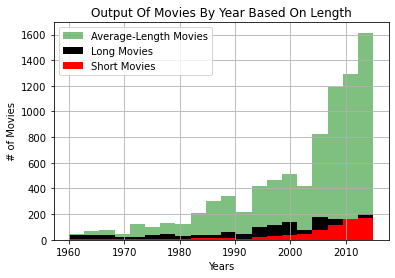

In [157]:
# Create a mask with 'runtime'
short_movies = df['runtime'] < 80
average_movies = (df['runtime'] >= 80) & (df['runtime'] <= 120)
long_movies = df['runtime'] > 120

#Lets see how the output level of each movie length (short, average, long) by year
df['release_year'][average_movies].hist(alpha=0.5, bins = 20, label = "Average-Length Movies", color = "green")
df['release_year'][long_movies].hist(bins = 20,label = "Long Movies",color = "black")
df['release_year'][short_movies].hist(bins = 20,label = "Short Movies", color = "red")
plt.title("Output Of Movies By Year Based On Length")
plt.xlabel("Years")
plt.ylabel("# of Movies")
plt.legend();

### Question 5:  What is the relationship between the films' length and vote average over time? 

> **Observation**: From the line plot, we can see that the voting averages for short movies is the most volatile while the ones for long movies are generally stable. However, it should be noted that long movies' averages have been experiencing a slight uptrend after a sudden drop after 1960. The voting averages for the Average-Length movies tell a different story; the averages have been steadily declining over the decades since the beginning, sinking below 6.0 and showing signs of trending down further.


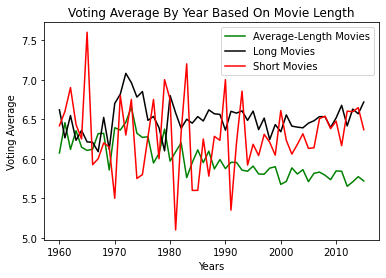

In [158]:
df[average_movies].groupby('release_year')['vote_average'].mean().plot(label = "Average-Length Movies", color = "green")
df[long_movies].groupby('release_year')['vote_average'].mean().plot(label = "Long Movies", color = "black")
df[short_movies].groupby('release_year')['vote_average'].mean().plot(label = "Short Movies", color = "red")
plt.title("Voting Average By Year Based On Movie Length")
plt.xlabel("Years")
plt.ylabel("Voting Average")
plt.legend();

### Question 6: Total Number Of Movies Released For Each Genre?

> **Observation**: As seen the bar graph below, Drama has released the most number of movies, followed by Comedy and Thriller The lowest output by genre is Western, which is a bit surprising.

<AxesSubplot:>

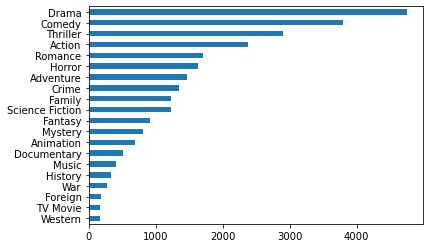

In [159]:
#Creating a function to split the genres and count them 
def count_genre(x):
    all_data = df[x].str.cat(sep = '|')
    specific_data = pd.Series(all_data.split('|'))
    #counting each of the genre
    counter = specific_data.value_counts(ascending=True)
    return counter

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh')

In [183]:
total_genre_movies

Western             165
TV Movie            167
Foreign             188
War                 270
History             334
Music               408
Documentary         520
Animation           699
Mystery             810
Fantasy             916
Science Fiction    1229
Family             1231
Crime              1354
Adventure          1471
Horror             1637
Romance            1712
Action             2384
Thriller           2907
Comedy             3793
Drama              4760
dtype: int64

### Question 7: Average Profit By Year?

> **Observation**: Overall, the line graph shows profit rising over the decades. From 1960 to 2015, we can see that the average profit has 6 times the intial average profit. This leads me to my final question. Is there a relationship between the release year and profit?

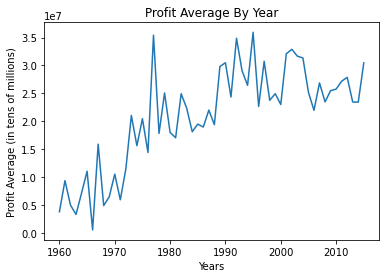

In [160]:
# We need to calculate Profit and a new column for it
df['profit'] = df['revenue'] - df['budget']

profit_year = df.groupby('release_year')['profit'].mean()
plt.plot(profit_year)
plt.title("Profit Average By Year")
plt.xlabel("Years")
plt.ylabel("Profit Average (in tens of millions)");

### Question 8:  What Is The Relationship Between Release Year And Profit?

> **Observation**: Now that we had a visualized the dataset, we can see that the datas are plotted straight across the graph in a literal straight line. We can tell from the graph that the correlation must be close to 0, which confirmed was in the next step to be about 0.03. This means that there is no relationship between the 2 variables!

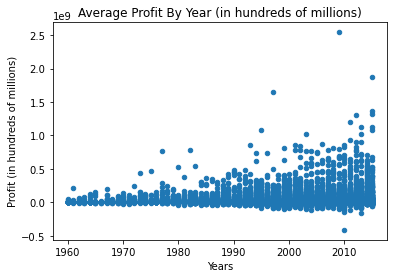

In [166]:
df.plot(x = 'release_year', y = 'profit', kind = "scatter")
plt.title("Average Profit By Year (in hundreds of millions)")
plt.xlabel("Years")
plt.ylabel("Profit (in hundreds of millions)");

In [167]:
print(f"The correlation between profit and release year is: {df.corr()['release_year']['profit']}.")

The correlation between profit and release year is: 0.032038264960691794.


<a id='conclusions'></a>
## Conclusions
### Summary
<ul>
    <li> Question 1: From the beginning of 1960 to 2015, the line graph shows an exponential increase of movies released per year, starting from about 25 movies and hovering between 600-700 in recent years.</li>    
    <li> Question 2: Over the long term, the average runtime is getting shorter with occasional spikes. The average runtime decreased from 111 minutes to 96.</li>    
    <li> Question 3: Since the 1960s, the line graph shows the average votes of all movies in each respective year has been declining from decade to decade. Starting from roughly 6.3 in the 60s then sinking to 5.9 as of 2015, even hitting a low point of 5.8.</li>    
    <li> Question 4: As we can see from the histogram, the output of average-length films has grown exponentially; average-length movies have consistently beaten long and short movies (combined) when it comes to output. The output for short films has remained almost the same until the 90s when it grew exponentially to catch up with long movies. </li>   
    <li> Question 5: From the line plot, we can see that the voting averages for short movies is the most volatile while the ones for long movies are generally stable. However, it should be noted that long movies' averages have been experiencing a slight uptrend after a sudden drop after 1960. The voting averages for the Average-Length movies tell a different story; the averages have been steadily declining over the decades since the beginning, sinking below 6.0 and showing signs of trending down further. </li>    
    <li> Question 6: Drama (4760) has released the most number of movies, followed by Comedy and Thriller The lowest output by genre is Western (165).</li>   
    <li> Question 7: Overall, the line graph shows profit rising over the decades. From 1960 to 2015, we can see that the average profit has 6 times the intial average profit, meaning that movies are becoming more profitable over the long run.</li>
    <li> Question 8: we can see that the datas are plotted straight across the graph, a literal straight line. We can tell from the graph that the correlation must be close to 0, which confirmed was in the next step to be about 0.03. This means that there is no relationship between the 2 variables!</li>
</ul>

### Limitations
There is one limitation that must be addressed. 
<ul>
    <li>The most obvious one is the missing data from the dataset, more specifically the missing rows with the missing revenue and budget. Since many of these missing values were in the early years, this affects their profitability. In other words, this would affect Questions 7 and 8. In other words, even though the films today may be more profitable, it might not be accurate to say that they are 6X as profitable as the films released in the 1960's.</li> 
</ul>